In [7]:
file_path_mapping = {
    "CaliAdv": "Dataset\\traj-caliAdv.csv",
    "DisHolly": "Dataset\\traj-disHolly.csv",
    "Disland": "Dataset\\traj-disland.csv",
    "Edin": "Dataset\\traj-Edin.csv",
    "Epcot": "Dataset\\traj-epcot.csv",
    "Glas": "Dataset\\traj-Glas.csv",
    "MagicK": "Dataset\\traj-MagicK.csv",
    "Melb": "Dataset\\traj-Melb.csv",
    "Osak": "Dataset\\traj-Osak.csv",
    "Toro": "Dataset\\traj-Toro.csv"
}



In [8]:
import csv

def parse_data(pathname):
    trajectory_data = {}

    with open(pathname, 'r') as csvfile:
        reader = csv.DictReader(csvfile)
        
        for row in reader:
            traj_id = int(row['trajID'])
            poi_id = int(row['poiID'])
            
            if traj_id not in trajectory_data:
                trajectory_data[traj_id] = []
            
            trajectory_data[traj_id].append(poi_id)

    for traj_id, poi_ids in list(trajectory_data.items()):
        if len(poi_ids) < 3:
            del trajectory_data[traj_id]

    return trajectory_data



In [23]:
trajectory_data = list(parse_data(file_path_mapping["CaliAdv"]).items())

print("Trajectory data: ")
for item in trajectory_data[:10]:
    print(item[0] , item[1])

print("Total number of trajectories: ")
print(len(trajectory_data))


Trajectory data: 
2080 [17, 18, 12, 5]
2706 [17, 23, 16, 11, 7, 5]
57 [17, 7, 16, 5]
5728 [19, 1, 17, 16, 6]
33 [19, 7, 16, 23, 12, 24, 25, 4, 14, 6]
606 [19, 16, 11, 7, 18, 6]
888 [19, 7, 6]
2424 [19, 14, 6]
4070 [19, 14, 6]
3990 [19, 14, 16, 9, 8, 23, 10, 6]
Total number of trajectories: 
1475


In [25]:
paths = [data[1] for data in trajectory_data]
for path in paths[:10]:
    print(path)


[17, 18, 12, 5]
[17, 23, 16, 11, 7, 5]
[17, 7, 16, 5]
[19, 1, 17, 16, 6]
[19, 7, 16, 23, 12, 24, 25, 4, 14, 6]
[19, 16, 11, 7, 18, 6]
[19, 7, 6]
[19, 14, 6]
[19, 14, 6]
[19, 14, 16, 9, 8, 23, 10, 6]


In [30]:
consecutive_pairs = [set(zip(path, path[1:])) for path in paths]
consecutive_pairs = list(set([pair for subset in consecutive_pairs for pair in subset]))
print(consecutive_pairs[:10])
print(len(consecutive_pairs))


[(15, 21), (18, 17), (7, 17), (8, 9), (11, 5), (19, 18), (8, 18), (11, 14), (11, 23), (4, 2)]
544


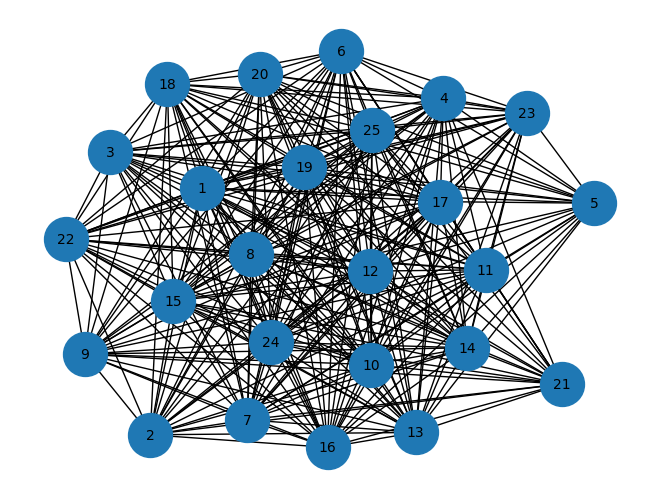

In [31]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_edges_from(consecutive_pairs)

# Draw the graph
nx.draw(G, with_labels=True, node_size=1000, font_size=10, font_color='black')
plt.show()